<h1>Preparación y limpieza de de datos </h1>
<p>Proyecto aplicado - Rescindidos Funeraria La Aurora</´p>
<p>Carlos Felipe Cortés Cataño - Carlos Luis Mora Cañas </p>

Se transformará la información extraida de distintas fuentes para asegurar que exista coherencia, accesibilidad y uniformidad

In [105]:
import pandas as pd

In [106]:
reporte = pd.read_excel("../data/reporte.xlsx")
reporte.head(3)

,CodigoPrograma,Direccion,TipoPrograma,coordenadas,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,Observaciones,GestionesRecaudo
0,55,Calle 46 B - Carrera 9 # 99,Familiar,"{""pos"":{""latitud"":5.457571499999999,""longitud""...",La Dorada,Inactivo - Inactivo rescindido,2019-06-14 07:00:02.857,NaN,NaN,NaN,NaN
1,56,Carrera 8 - Calle 17 # 28,Familiar,"{""pos"":{""latitud"":5.4540733,""longitud"":-74.668...",La Dorada,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,"[{""Estado"":""Inactivo - Influencia de seres cer...","[{""factura"":""AUOF-3815"",""valorTotalFacturaSinD...","[{""fechaIngreso"":""18\/05\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."
2,58,Calle 44 - Carrera 8 C # 14,Familiar,"{""pos"":{""latitud"":5.443969399999999,""longitud""...",La Dorada,Inactivo - Dificultad para ubicarlo,2020-09-01 05:00:00.000,"[{""Estado"":""Inactivo - Dificultad para ubicarl...","[{""factura"":""AUOF-1910"",""valorTotalFacturaSinD...","[{""fechaIngreso"":""30\/01\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito..."


Se evidencia valores duplicados, eliminamos duplicados y reducimos el conjunto de datos de 70.787 a 70.320

In [107]:
len(reporte)

70787

In [108]:
reporte = reporte.drop_duplicates(subset=["CodigoPrograma", "EstadoActual"], keep="first")
len(reporte)


70320

Se identifican registros donde en el ultimo atributo se obtiene mucho texto y se traslada a la siguiente columna, dichos valores son eliminados

In [109]:
reporte = reporte.drop(reporte[reporte["TipoPrograma"].isna()].index)
len(reporte)


70301

Se identifica tipo de programa Empresarial, no es nuestro objetivo. El análisis se realizará en Familiar, debido a que empresarial no tiene un comportamiento similar según el experto de la organización.

[]

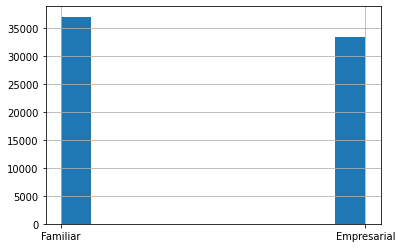

In [110]:
reporte["TipoPrograma"].hist().plot()

In [111]:
reporte = reporte[reporte["TipoPrograma"] != "Empresarial"]
len(reporte)

36960

In [112]:
reporte["coordenadas"]

0        {"pos":{"latitud":5.457571499999999,"longitud"...
1        {"pos":{"latitud":5.4540733,"longitud":-74.668...
2        {"pos":{"latitud":5.443969399999999,"longitud"...
3                                                      NaN
4                                                      NaN
                               ...                        
70779                                                  NaN
70780                                                  NaN
70782                                                  NaN
70783                                                  NaN
70784                                                  NaN
Name: coordenadas, Length: 36960, dtype: object

In [113]:
temp = reporte.copy()[["CodigoPrograma", "coordenadas"]].dropna()
temp = temp.set_index("CodigoPrograma")
temp["coordenadas"] = temp["coordenadas"].apply(
    lambda indice: indice.split(',"pov":')[0])
temp["coordenadas"] = temp["coordenadas"].apply(
    lambda indice: indice.replace('{"pos":{"latitud":', "").replace("}", "").replace('"longitud":', ""))
temp = temp["coordenadas"].str.split(",", expand=True).rename(
    columns={0: "latitud", 1: "longitud"}).reset_index()
reporte = reporte.merge(temp, on="CodigoPrograma", how="left").drop("coordenadas", axis=1)
reporte.head(3)


/home/apoyo/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


,CodigoPrograma,Direccion,TipoPrograma,LocalidadVenta,EstadoActual,FechaRescindido,Estados,Cuotas,Observaciones,GestionesRecaudo,latitud,longitud
0,55,Calle 46 B - Carrera 9 # 99,Familiar,La Dorada,Inactivo - Inactivo rescindido,2019-06-14 07:00:02.857,NaN,NaN,NaN,NaN,5.457571499999999,-74.67034009999998
1,56,Carrera 8 - Calle 17 # 28,Familiar,La Dorada,Inactivo - Influencia de seres cercanos,2020-07-23 05:00:00.000,"[{""Estado"":""Inactivo - Influencia de seres cer...","[{""factura"":""AUOF-3815"",""valorTotalFacturaSinD...","[{""fechaIngreso"":""18\/05\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.4540733,-74.66815350000002
2,58,Calle 44 - Carrera 8 C # 14,Familiar,La Dorada,Inactivo - Dificultad para ubicarlo,2020-09-01 05:00:00.000,"[{""Estado"":""Inactivo - Dificultad para ubicarl...","[{""factura"":""AUOF-1910"",""valorTotalFacturaSinD...","[{""fechaIngreso"":""30\/01\/2020 "",""empleado"":""J...","[{""Estado"":""Exitosa - Gestión de recaudo exito...",5.443969399999999,-74.6851792


In [114]:
len(reporte["latitud"].isna())

36960

In [115]:
len(reporte)


36960

Dada la cantidad de nulos se busca la oportunidad de completar algunas localizaciones usando la dirección y adicionar la variable estrato, para ello se usará un georeferenciador provisionado por la empresa

In [116]:
reporte[["CodigoPrograma", "latitud", "longitud", "Direccion", "LocalidadVenta"]].to_csv("../data/outputs/search_loc.csv", index=False)

<p></h1>Se encuentran registros fuera del pais</p>
<img src="../data/outputs/fuera_pais.png"/>

In [127]:
estratos = pd.read_csv("../data/outputs/estratos.csv", sep=";")
estratos.head(3)


,CodigoPrograma,latitud,longitud,Direccion,Fuera del Pais,LocalidadVenta,MunicipioS,Nivel Socio Economico
0,1603,-33.675352,-65.458672,CONJUNTO VILLA MERCEDES BLOQUE A APTO 603,0,Manizales,NaN,NaN
1,9074,-32.897442,-68.829727,MZA 22 CASA 444 CIUDADELA LA LINDA,0,Manizales,NaN,NaN
2,33574,-32.889459,-68.845839,MZA 3 CASA 29 LAURELES,0,Dosquebradas,NaN,NaN


In [141]:
reporte.columns

Index(['CodigoPrograma', 'Direccion', 'TipoPrograma', 'LocalidadVenta',
       'EstadoActual', 'FechaRescindido', 'Estados', 'Cuotas', 'Observaciones',
       'GestionesRecaudo', 'latitud', 'longitud'],
      dtype='object')

In [142]:
reporte.drop(["latitud", "longitud", "Direccion",
             "LocalidadVenta"], axis=1, inplace=True)


In [144]:

reporte = reporte.merge(estratos, on="CodigoPrograma", how="left")


In [145]:
reporte.to_csv("../data/outputs/reporte_v2.csv")

In [ ]:
temp["coordenadas"].iloc[55].split(',"pov":')[0]


'{"pos":{"latitud":5.475582019363229,"longitud":-74.67299778430248}'

In [ ]:


temp = temp["Estados"].str.split("},", expand=True).stack(
).reset_index().drop("level_1", axis=1).set_index("CodigoPrograma")
temp = temp[0].str.split(",", expand=True)
temp[1] = temp[2].where(~temp[2].isna(), temp[1])
temp = temp.reset_index().rename(columns={"CodigoPrograma": "id_programa", 0: "nombre_estado",
                                          1: "fecha_estado"}).drop(2, axis=1)
temp["nombre_estado"] = temp["nombre_estado"].str.replace(
    '{"Estado":"', "", regex=True).str.replace('"', "", regex=True)
temp["fecha_estado"] = temp["fecha_estado"].str.replace(
    '"fechainicio":"', "", regex=True).str.replace(
    '"fechacancelacion":"', "", regex=True).str.replace('"}', "", regex=True).str.replace('"', "", regex=True)
temp = temp.merge(new_historico.drop(
    ["nombre_estado", "fecha_estado"], axis=1), on="id_programa", how="left")
temp["fecha_estado"] = pd.to_datetime(temp["fecha_estado"])
temp
